***Iris Flower Classification:***

In [ ]:
!pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]
warnings.simplefilter(action= "ignore", category=FutureWarning)

In [ ]:
ds=pd.read_csv('/content/IRIS.csv')

In [ ]:
ds.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
ds.shape

(150, 5)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
ds["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Representing Missing Values with the help of heatmap.

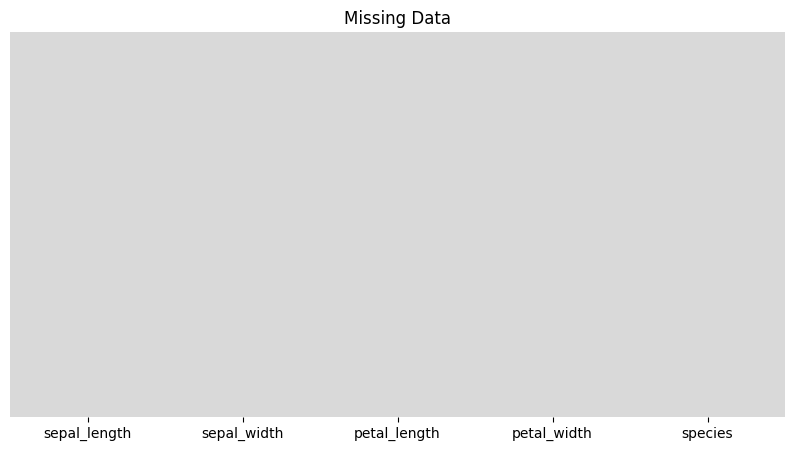

In [ ]:
sns.heatmap(ds.isnull(),yticklabels = False, cbar= False, cmap= 'tab20c_r')
plt.title('Missing Data')
plt.show()

It has been seen in the heatmap that there in no null value in dataset.

In [ ]:
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Visualization of different features with respect to species column.**

<Axes: xlabel='sepal_length', ylabel='count'>

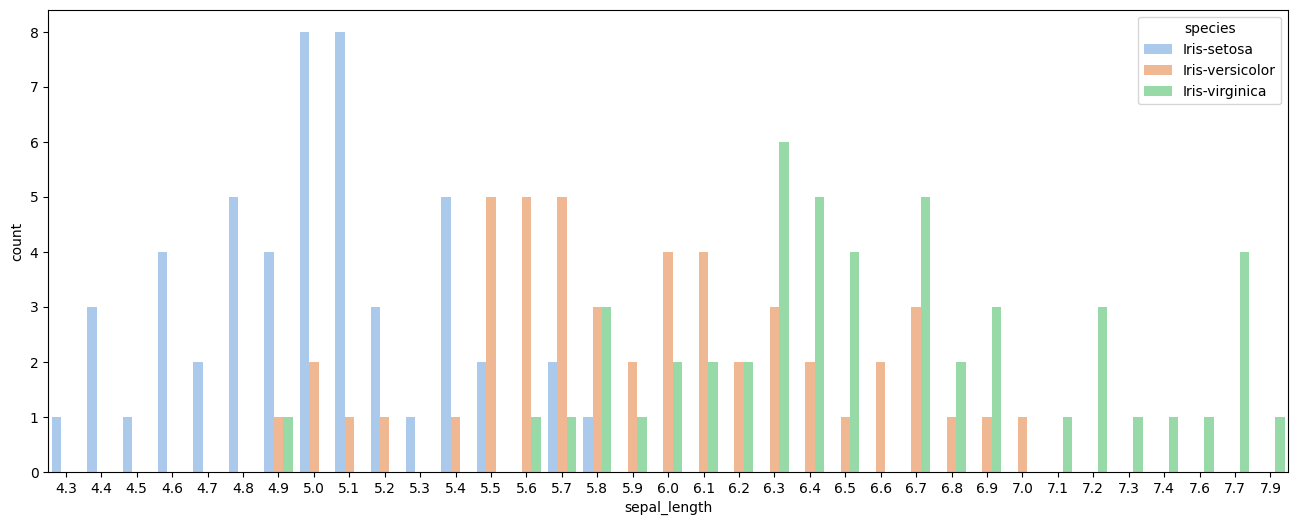

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=ds['sepal_length'], hue=ds['species'], palette='pastel')

In the graph it is shown that setosa has lower sepal_length and verginica has higher sepal_length.

<Axes: xlabel='sepal_width', ylabel='count'>

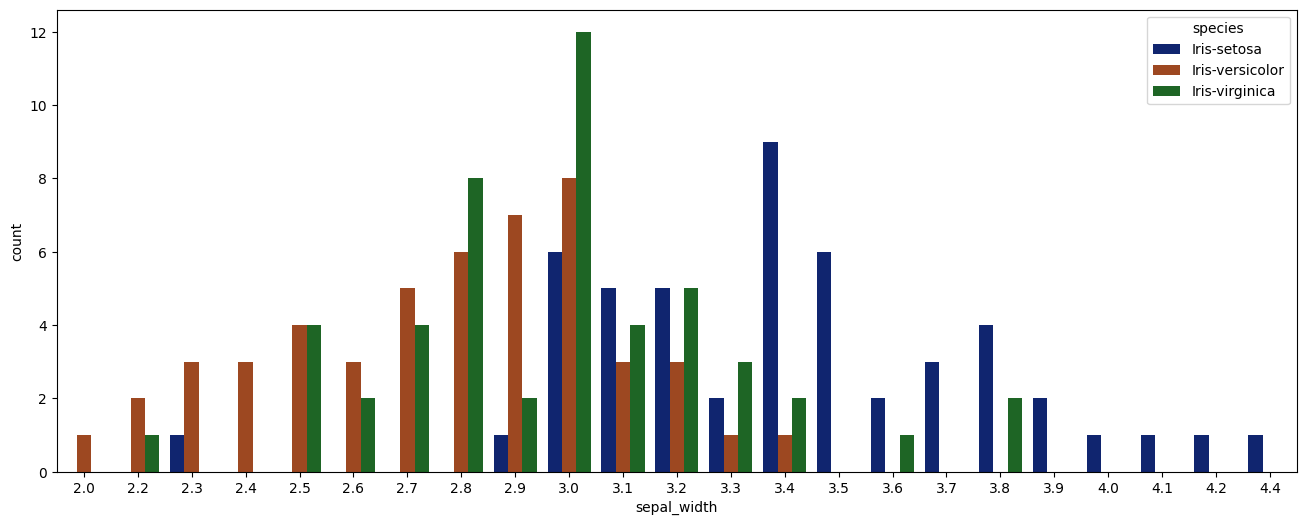

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=ds['sepal_width'], hue=ds['species'], palette='dark')

In the graph it is shown that setosa has higher sepal_width and versicolor has lower sepal_width.

<Axes: xlabel='petal_length', ylabel='count'>

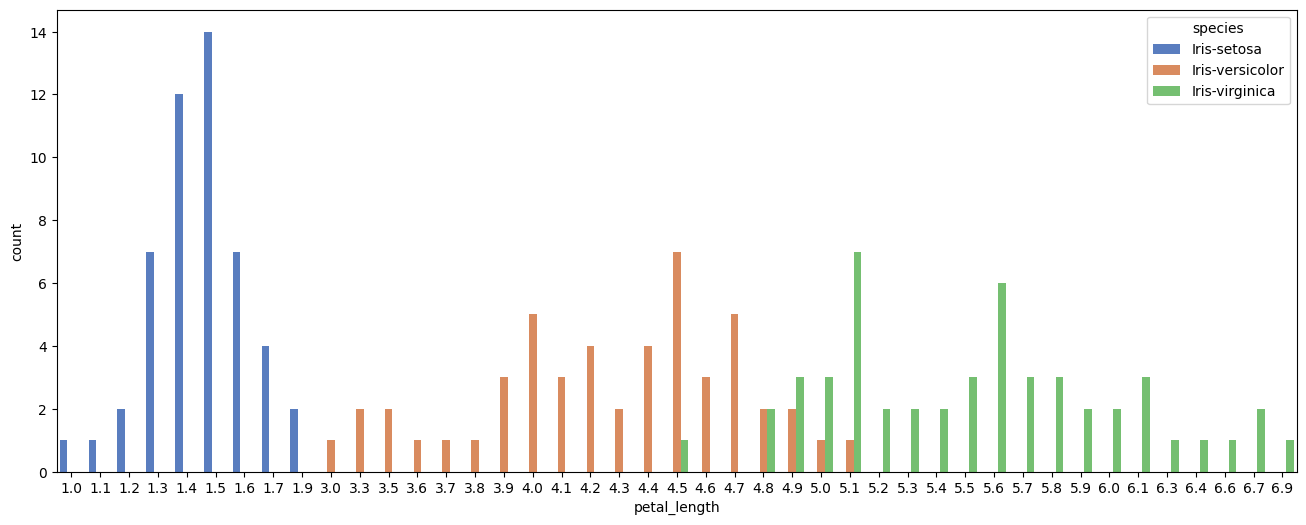

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=ds['petal_length'], hue=ds['species'], palette='muted')

In the graph it is shown that setosa has lower petal_length and verginica has higher petal_length.

<Axes: xlabel='petal_width', ylabel='count'>

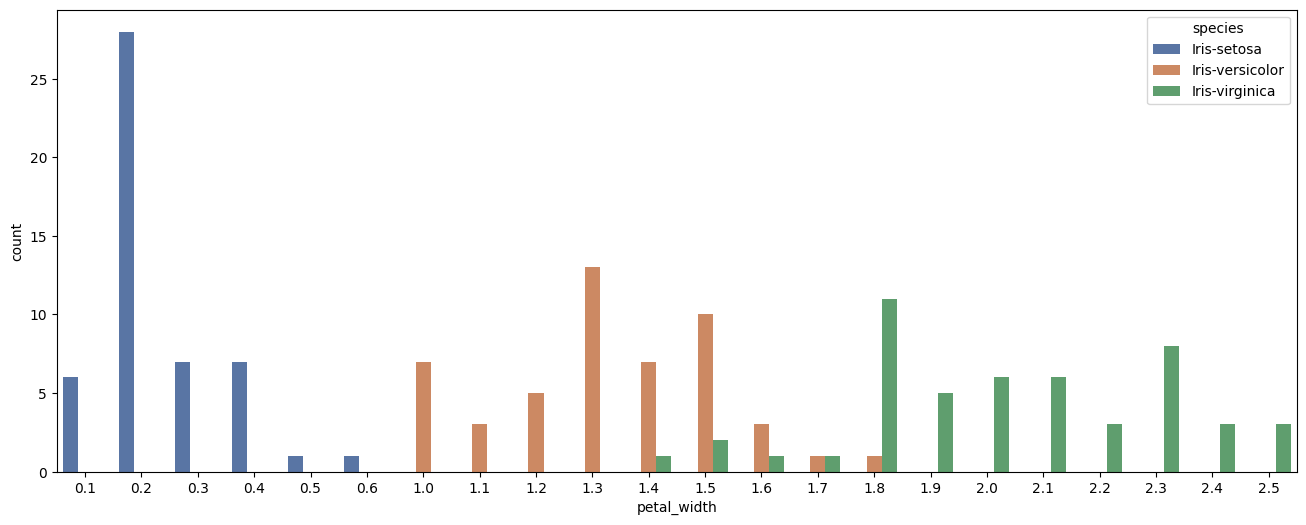

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=ds['petal_width'], hue=ds['species'], palette='deep')

In the graph it is shown that setosa has lower petal_width and verginica has higher petal_width.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

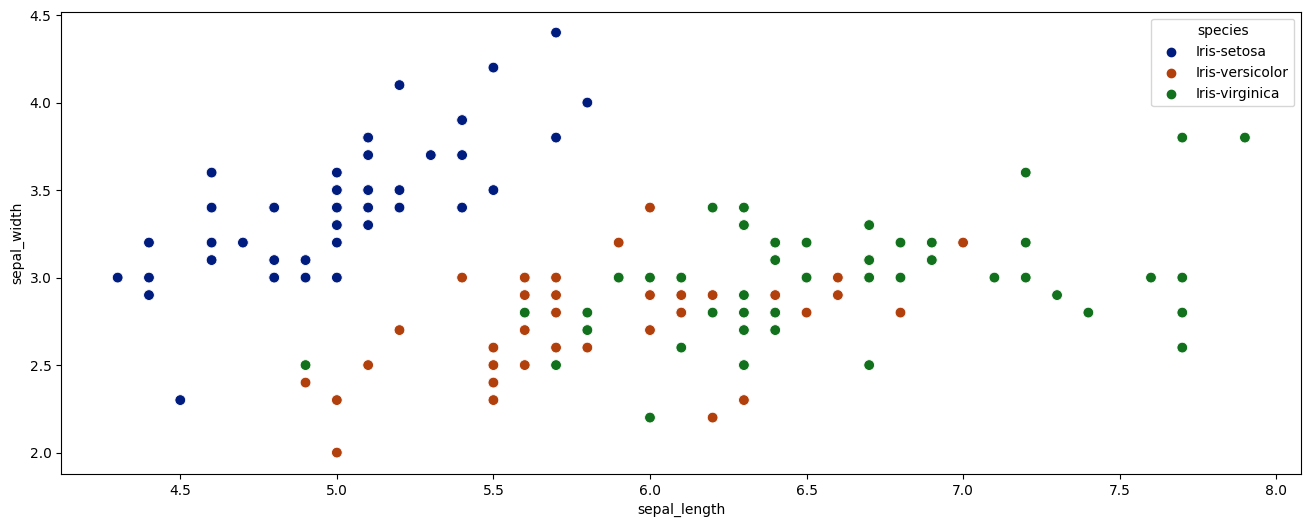

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=ds['sepal_length'],y=ds['sepal_width'], hue=ds['species'], palette='dark', s=60)

<Axes: xlabel='petal_length', ylabel='petal_width'>

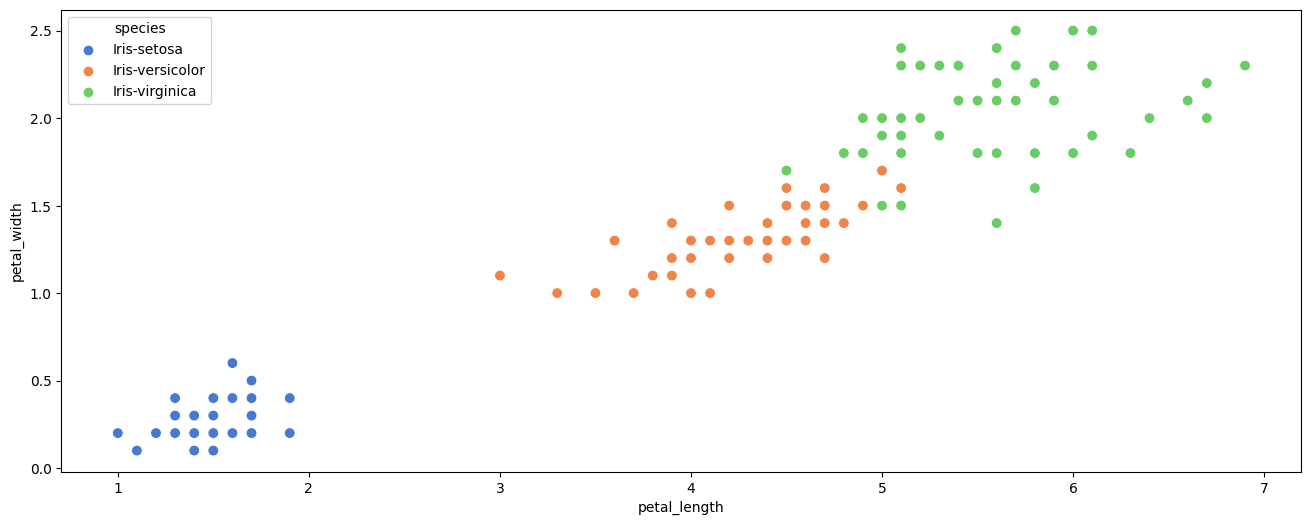

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=ds['petal_length'],y=ds['petal_width'], hue=ds['species'], palette='muted', s=60)

<Figure size 600x600 with 0 Axes>

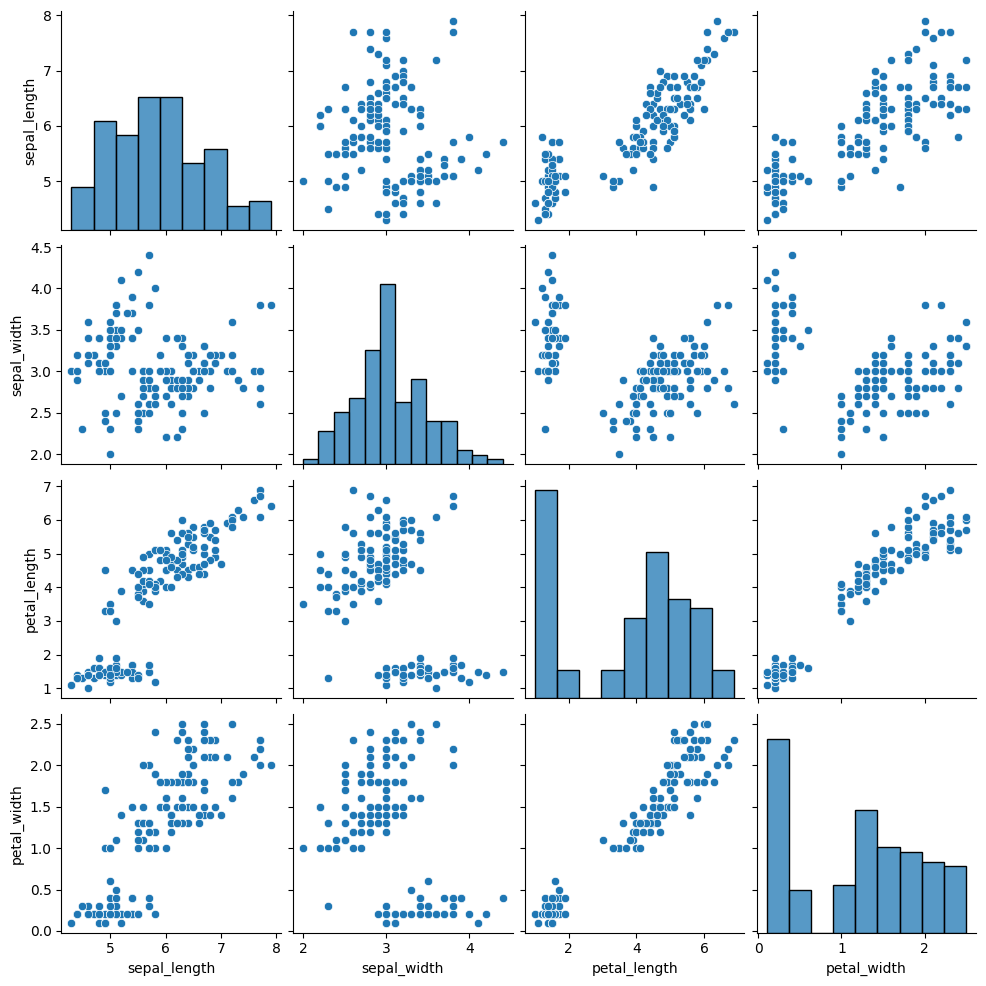

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(ds)

Split that for model training and testing process

In [ ]:
x=ds.drop('species', axis=1)
y=ds['species'] # This is the column that is intend to be predicted.
# Use x and y variables to split the Dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.20, random_state=101)


In [ ]:
x_train.shape
x_train

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


In [ ]:
y_train

104     Iris-virginica
89     Iris-versicolor
116     Iris-virginica
82     Iris-versicolor
112     Iris-virginica
            ...       
63     Iris-versicolor
70     Iris-versicolor
81     Iris-versicolor
11         Iris-setosa
95     Iris-versicolor
Name: species, Length: 120, dtype: object

In [ ]:
x_test.shape
x_test

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4
123,6.3,2.7,4.9,1.8
68,6.2,2.2,4.5,1.5
53,5.5,2.3,4.0,1.3
146,6.3,2.5,5.0,1.9
1,4.9,3.0,1.4,0.2


Using ML model to prdict the iris flower species.

In [ ]:
# Importing Model
from sklearn.linear_model import LogisticRegression
# Create model
lreg=LogisticRegression()
# Passing Training data to model
lreg.fit(x_train, y_train)


LogisticRegression()

In [ ]:
#accuracy on training data
from sklearn.metrics import classification_report,  accuracy_score
x_train_p=lreg.predict(x_train)
training_accuracy= accuracy_score(x_train_p,y_train)
print('training accuracy=', training_accuracy)

training accuracy= 0.9666666666666667


In [ ]:
#accuracy on testing data
x_test_p=lreg.predict(x_test)
testing_accuracy= accuracy_score(x_test_p,y_test)
print('testing accuracy=', testing_accuracy)

testing accuracy= 1.0


In [ ]:
y_pr_lreg = lreg.predict(x_test)
print(y_pr_lreg)
print(y_pr_lreg.shape)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
(30,)


In [ ]:
y_test

33         Iris-setosa
16         Iris-setosa
43         Iris-setosa
129     Iris-virginica
50     Iris-versicolor
123     Iris-virginica
68     Iris-versicolor
53     Iris-versicolor
146     Iris-virginica
1          Iris-setosa
147     Iris-virginica
32         Iris-setosa
31         Iris-setosa
122     Iris-virginica
127     Iris-virginica
74     Iris-versicolor
88     Iris-versicolor
96     Iris-versicolor
42         Iris-setosa
134     Iris-virginica
80     Iris-versicolor
48         Iris-setosa
90     Iris-versicolor
65     Iris-versicolor
97     Iris-versicolor
64     Iris-versicolor
93     Iris-versicolor
114     Iris-virginica
25         Iris-setosa
41         Iris-setosa
Name: species, dtype: object

**Performance of the model:** Here we have create a machine learnig model that predict the classification of iris flower into different species on the basis of given measurements.The accuracy score of model training and testing is approximately same, we can say that our model's performance is good.